The COVID-19 pandemic has had a significant impact on global health, making rapid and accurate diagnosis crucial. This project aims to develop a machine learning model to predict COVID-19 infection from chest X-ray images and associated metadata. The model will help healthcare professionals make informed decisions, especially in resource-constrained settings.

#### Dataset Description

The dataset consists of two main components:

1.  **Images:** Chest X-ray images stored in the `covid19` folder.
2.  **Metadata:** A CSV file (`metadata.csv`) containing patient information and clinical features.

**Metadata CSV Columns:**

-   `filename`: Name of the image file.
-   `patient_id`: Unique identifier for the patient.
-   `sex`: Sex of the patient.
-   `age`: Age of the patient.
-   `view`: View type of the X-ray (e.g., PA, AP).
-   `label`: Diagnosis label (e.g., COVID-19).
-   `pcr_test`: Result of the PCR test.
-   `survival`: Survival status of the patient.
-   `location`: Location of the patient.
-   `admission_offset`: Days since admission.
-   `symptom_offset`: Days since symptom onset.
-   `also_had_ct`: Whether the patient also had a CT scan.
-   `has_fever`, `has_cough`, `has_dyspnea`, `has_diarrhea`: Symptoms present.
-   `spo2`: Oxygen saturation level.
-   `other_symptoms`: Other symptoms.
-   `medical_background`: Medical background of the patient.
-   `opacification`: Lung opacification status.
-   `other`: Other information.
-   `is_bilateral`: Bilateral involvement.
-   `url`: URL to the source.

### Step-by-Step Implementation

#### 1\. Data Preprocessing

**a. Load Metadata**

In [1]:
import pandas as pd

# Load the metadata CSV file
metadata = pd.read_csv('covid_cx_dataset/metadata.csv')

# Display the first few rows of the metadata
print(metadata.head())

  filename  patient_id     sex   age view     label  pcr_test  survival  \
0  260.jpg          10  female  68.0  NaN  COVID-19  positive       NaN   
1  261.jpg          11    male  47.0  NaN  COVID-19  positive       NaN   
2  262.jpg          11    male  47.0  NaN  COVID-19  positive       NaN   
3  263.jpg          11    male  47.0  NaN  COVID-19  positive       NaN   
4  264.jpg          11    male  47.0  NaN  COVID-19  positive       NaN   

  location  admission_offset  ...  has_cough  has_dyspnea  has_diarrhea  spo2  \
0    Spain               NaN  ...        1.0          NaN           NaN   NaN   
1    Spain               1.0  ...        NaN          NaN           NaN   NaN   
2    Spain               4.0  ...        NaN          NaN           NaN   NaN   
3    Spain               8.0  ...        NaN          NaN           NaN   NaN   
4    Spain              12.0  ...        NaN          NaN           NaN   NaN   

   other_symptoms  medical_background  opacification other is_

**b. Handle Missing Values and Encode Categorical Variables**

In [2]:
# Handle missing values
metadata.fillna(method='ffill', inplace=True)

# Encode categorical variables
metadata['sex'] = metadata['sex'].map({'male': 0, 'female': 1})
metadata['pcr_test'] = metadata['pcr_test'].map({'positive': 1, 'negative': 0})

# Display the processed metadata
print(metadata.head())


  filename  patient_id  sex   age view     label  pcr_test  survival location  \
0  260.jpg          10    1  68.0  NaN  COVID-19         1       NaN    Spain   
1  261.jpg          11    0  47.0  NaN  COVID-19         1       NaN    Spain   
2  262.jpg          11    0  47.0  NaN  COVID-19         1       NaN    Spain   
3  263.jpg          11    0  47.0  NaN  COVID-19         1       NaN    Spain   
4  264.jpg          11    0  47.0  NaN  COVID-19         1       NaN    Spain   

   admission_offset  ...  has_cough  has_dyspnea  has_diarrhea  spo2  \
0               NaN  ...        1.0          NaN           NaN   NaN   
1               1.0  ...        1.0          NaN           NaN   NaN   
2               4.0  ...        1.0          NaN           NaN   NaN   
3               8.0  ...        1.0          NaN           NaN   NaN   
4              12.0  ...        1.0          NaN           NaN   NaN   

   other_symptoms  medical_background  opacification other is_bilateral  \
0    

C:\Users\srini\AppData\Local\Temp\ipykernel_29840\4202207131.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metadata.fillna(method='ffill', inplace=True)


**c. Load and Preprocess X-ray Images**

In [6]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.9 MB/s eta 0:00:21
   ---------------------------------------- 0.1/38.8 MB 1.6 MB/s eta 0:00:24
   ---------------------------------------- 0.1/38.8 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.1/38.8 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.1/38.8 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.1/38.8 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.1/38.8 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.1/38.8 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.2/38.8 MB 602.4 kB/s eta 0:01:05
   ----------------------

In [20]:
import os
import cv2
import numpy as np

# Path to the images
image_path = 'covid_cx_dataset/covid19/'

# Function to load and preprocess images
def load_images(image_names):
    images = []
    for image_name in image_names:
        image_file = os.path.join(image_path, image_name)
        if not os.path.isfile(image_file):
            print(f"File {image_name} does not exist.")
            continue
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Image {image_name} could not be read.")
            continue
        image = cv2.resize(image, (224, 224))  # Resize to 224x224 pixels
        image = image / 255.0  # Normalize pixel values
        images.append(image)
    return np.array(images)

# Load images
image_filenames = metadata['filename'].values
images = load_images(image_filenames)

# Check if images are loaded correctly
print(f"Number of images loaded: {len(images)}")


Number of images loaded: 450


#### 2\. Exploratory Data Analysis (EDA)

**a. Visualize Key Features**

C:\Users\srini\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


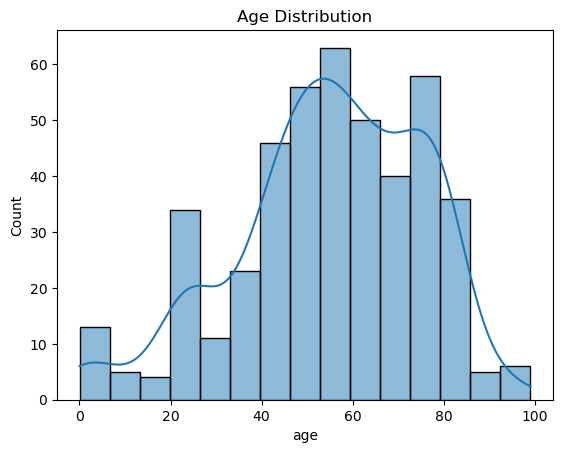

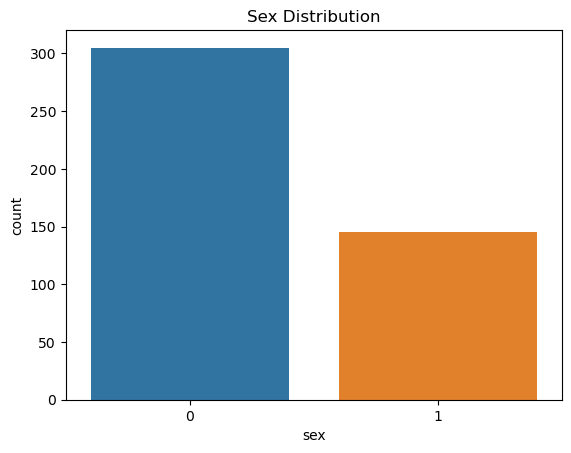

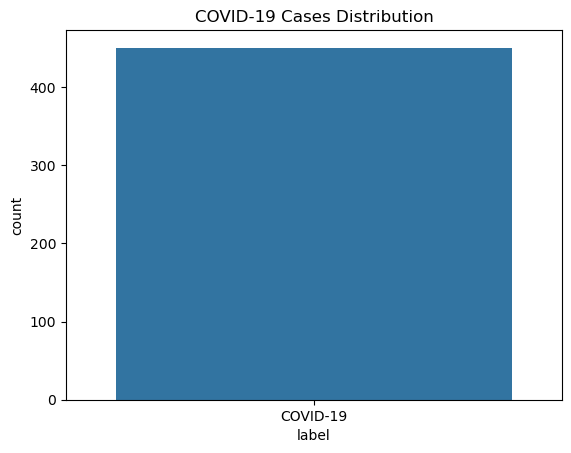

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of age
sns.histplot(metadata['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Plot distribution of sex
sns.countplot(x='sex', data=metadata)
plt.title('Sex Distribution')
plt.show()

# Plot distribution of COVID-19 cases
sns.countplot(x='label', data=metadata)
plt.title('COVID-19 Cases Distribution')
plt.show()


**b. Correlation Analysis**

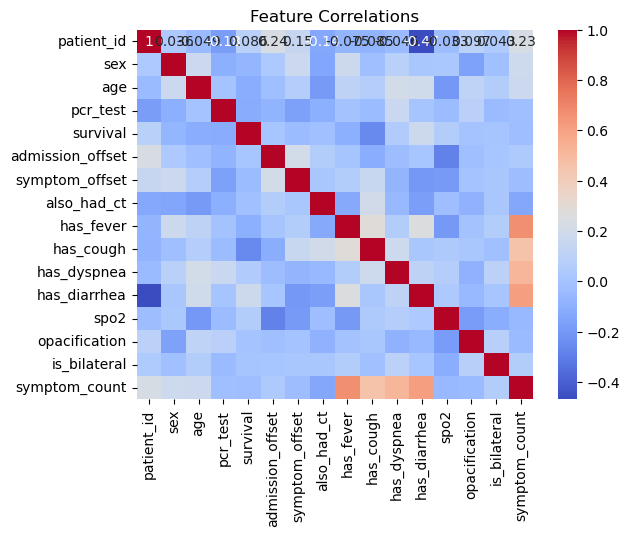

In [22]:
# Calculate correlations
correlations = metadata.corr(numeric_only=True)

# Plot heatmap of correlations
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

#### 3\. Feature Engineering

**a. Create New Features**

In [23]:
# Create age groups
metadata['age_group'] = pd.cut(metadata['age'], bins=[0, 30, 50, 70, 100], labels=['0-30', '31-50', '51-70', '71-100'])

# Create symptom count
metadata['symptom_count'] = metadata[['has_fever', 'has_cough', 'has_dyspnea', 'has_diarrhea']].sum(axis=1)

# Display the new features
print(metadata[['age', 'age_group', 'symptom_count']].head())


    age age_group  symptom_count
0  68.0     51-70            2.0
1  47.0     31-50            2.0
2  47.0     31-50            2.0
3  47.0     31-50            2.0
4  47.0     31-50            2.0


**b. Extract Features from Images Using Pre-trained CNN**

In [24]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model that outputs the features from the last convolutional layer
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

# Extract features from images
features = model.predict(np.stack([np.stack([img]*3, axis=-1) for img in images]))

# Display shape of the extracted features
print(features.shape)


15/15 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step
(450, 7, 7, 2048)


#### 4\. Model Development

**a. Combine Metadata and Image Features**

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardize the metadata features
scaler = StandardScaler()
metadata_features = scaler.fit_transform(metadata[['age', 'sex', 'symptom_count']])

# Combine metadata features and image features
X = np.hstack([metadata_features, features.reshape(features.shape[0], -1)])
y = metadata['label'].map({'COVID-19': 1, 'non-COVID-19': 0}).values

# Display shape of the combined features
print(X.shape)


(450, 100355)


**b. Train-Test Split**

In [26]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(360, 100355) (90, 100355) (360,) (90,)


**c. Train a Classification Model**

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(accuracy)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


1.0
Model Accuracy: 100.00%


#### 5\. Model Evaluation

**a. Evaluate Using Different Metrics**

In [31]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict on the test set
y_prob = model.predict(X_test).flatten()  # Get the probabilities
y_pred = (y_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        90

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.